# 📊 Campus Recruitment Prediction

## 📌 Overview
This is a Machine Learning classification challenge in the context of the course *Artificial Intelligence* at Thomas More.  
The goal is to predict **whether a student will be recruited for a job**.  
Additionally, we will also predict the **starting salary** as a secondary (bonus) task.

Install the following libraries in order to start.

In [57]:
!pip install graphviz pydotplus scikit-learn pandas numpy matplotlib seaborn

You should consider upgrading via the 'C:\Users\mohah\Desktop\AI\ML_T10\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

## 📂 Available Data  
We have three datasets:  
- **Sample data:** `sample_submission.csv`  
- **Test data:** `test_campusrecruit.csv`  
- **Training data:** `train_campusrecruit.csv`  

## 🔍 Exploratory Data Analysis (EDA)  
Before modeling, we analyze the dataset to find patterns, missing values, and correlations.

In [59]:
#locate files
sample_submission = 'Resources/sample_submission.csv'
test_campusrecruit = 'Resources/test_campusrecruit.csv'
train_campusrecruit = 'Resources/train_campusrecruit.csv'

#read the files
ss = pd.read_csv(sample_submission)
test_cr = pd.read_csv(test_campusrecruit)
train_cr = pd.read_csv(train_campusrecruit)

printing the first 5 rows of each dataset


In [60]:
print("Sample Submission:")
ss.head()

Sample Submission:


,id,status
0,655,Placed
1,910,Placed
2,447,Placed
3,324,Placed
4,178,Placed


In [61]:
print("\nTest Campus Recruit:")
test_cr.head()


Test Campus Recruit:


,id,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,655,M,82.34,Others,66.04,Others,Commerce,71.50,Comm&Mgmt,Yes,65.98,Mkt&Fin,65.42
1,910,M,66.75,Others,44.96,Others,Commerce,53.47,Comm&Mgmt,No,91.46,Mkt&HR,61.15
2,447,M,67.86,Others,69.44,Central,Science,83.54,Comm&Mgmt,No,59.70,Mkt&Fin,63.60
3,324,M,52.05,Others,53.75,Others,Science,55.66,Comm&Mgmt,No,58.31,Mkt&Fin,63.91
4,178,M,61.80,Central,59.40,Central,Science,64.12,Comm&Mgmt,Yes,61.90,Mkt&Fin,59.93


In [62]:
print("\nTrain Campus Recruit:")
train_cr.head()


Train Campus Recruit:


,id,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,61,M,61.84,Others,57.93,Others,Science,68.03,Sci&Tech,No,60.60,Mkt&HR,55.10,Not Placed,0.0
1,273,M,63.06,Central,75.61,Central,Commerce,63.40,Comm&Mgmt,Yes,62.33,Mkt&HR,54.69,Placed,424507.0
2,489,M,76.34,Central,63.37,Central,Science,71.33,Sci&Tech,No,53.98,Mkt&HR,53.03,Placed,200000.0
3,721,M,54.12,Others,65.47,Others,Commerce,73.83,Comm&Mgmt,Yes,62.09,Mkt&Fin,58.87,Not Placed,0.0
4,95,M,63.12,Others,68.94,Central,Commerce,66.08,Comm&Mgmt,Yes,71.99,Mkt&HR,67.01,Placed,327148.0


Check for missing values

In [63]:
print("\nMissing Values in Training Data:")
print(train_cr.isnull().sum())


Missing Values in Training Data:
id                  0
gender            300
ssc_p             300
ssc_b             300
hsc_p             300
hsc_b             300
hsc_s             300
degree_p          300
degree_t          300
workex            300
etest_p           300
specialisation    300
mba_p             300
status            300
salary              0
dtype: int64


Summary statistics for numerical columns

In [64]:
print("\nSummary Statistics:")
print(train_cr.describe())



Summary Statistics:
                id       ssc_p       hsc_p    degree_p     etest_p  \
count  1000.000000  700.000000  700.000000  700.000000  700.000000   
mean    499.500000   66.610957   65.880457   66.370743   72.048686   
std     288.819436   11.216839   10.968154    7.644842   13.739664   
min       0.000000   40.890000   37.000000   50.000000   50.000000   
25%     249.750000   58.927500   59.432500   61.587500   60.022500   
50%     499.500000   66.465000   65.460000   66.420000   70.940000   
75%     749.250000   75.077500   72.622500   71.392500   82.855000   
max     999.000000   89.400000   97.700000   91.000000   98.000000   

            mba_p         salary  
count  700.000000    1000.000000  
mean    62.434157  195593.581000  
std      6.229540  160103.314096  
min     51.210000       0.000000  
25%     57.660000       0.000000  
50%     62.120000  205582.500000  
75%     66.927500  294109.250000  
max     77.890000  940000.000000  


# Visualizing distributions of numerical features and correlation between features

<Figure size 1200x600 with 0 Axes>

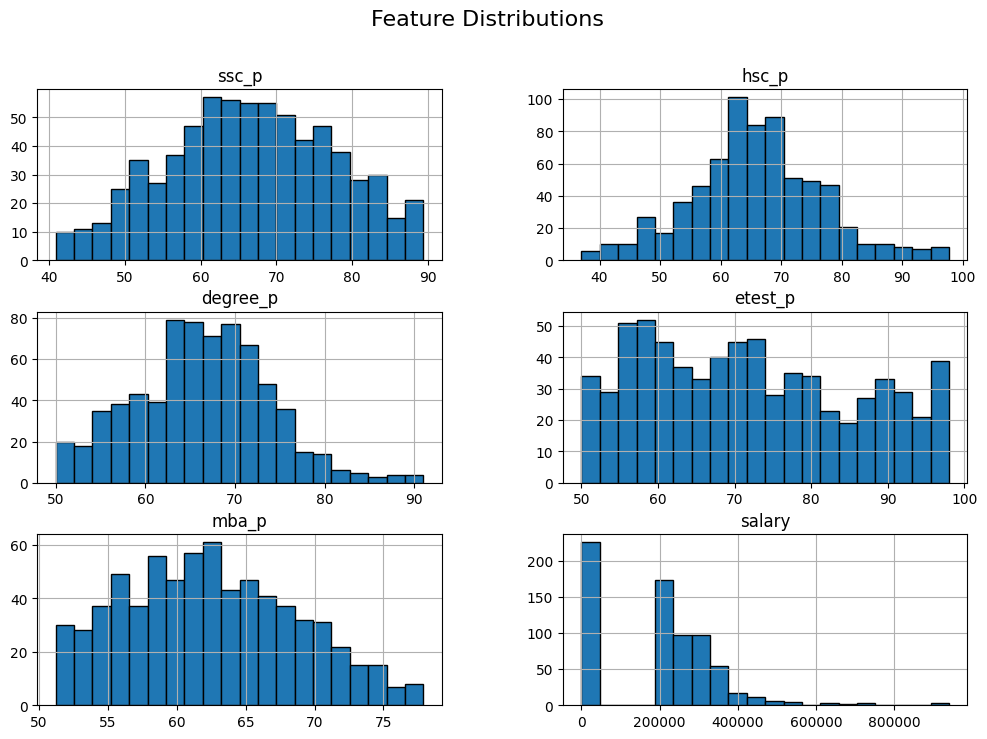

In [ ]:
# Visualizing distributions of numerical features
plt.figure(figsize=(12, 6))
train_cr.drop(columns=['id', 'gender', 'workex']).hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

### Feature Distributions Breakdown

Below is an analysis of the distributions of different numerical features in the dataset:

- **ssc_p (10th grade percentage)**: Appears to be roughly normally distributed, with most students scoring between **50-90%**.
- **hsc_p (12th grade percentage)**: Similar to `ssc_p`, but slightly right-skewed, meaning more students have **higher scores**.
- **degree_p (Undergraduate percentage)**: Shows a peak around **60-80%**, indicating most students fall within this range.
- **etest_p (Employability test percentage)**: Displays an irregular distribution with multiple peaks, suggesting certain score ranges are more common.
- **mba_p (MBA percentage)**: Mostly normal distribution, with scores concentrated between **50-75%**.
- **salary**: Strongly **right-skewed**, meaning most students have **lower salaries**, but a few have **extremely high salaries** (potential outliers).

### Encoding Categorical Features

Machine learning models need numerical data, so we encode categorical variables into numbers. Here are the two main ways:

1. **Label Encoding**: Converts categories to unique numbers (e.g., "Male" → 0, "Female" → 1). Best for **binary** features or when there's an **order** (e.g., Low, Medium, High).

2. **One-Hot Encoding**: Creates a new column for each category with 0s and 1s (e.g., "Engineering" → [1, 0, 0], "Management" → [0, 1, 0], "Arts" → [0, 0, 1]). Best for features with **no order** (e.g., `degree_t` or `hsc_s`).

### Why We Use Encoding:
- **Model Compatibility**: Makes categorical features readable for machine learning models.
- **Better Learning**: Helps the model understand the data without assuming any false order or relationship.


In [66]:
# Label Encoding binary categorical columns (gender and work experience)
label_encoder = LabelEncoder()
train_cr['gender'] = label_encoder.fit_transform(train_cr['gender'])
train_cr['workex'] = label_encoder.fit_transform(train_cr['workex'])

# One-Hot Encoding for multiclass categorical columns (ssc_b, hsc_b, hsc_s, degree_t, specialisation)
train_cr = pd.get_dummies(train_cr, columns=['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'specialisation'], drop_first=True)

# Display the first few rows after encoding
train_cr.head()


,id,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,salary,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&HR
0,61,1,61.84,57.93,68.03,0,60.60,55.10,Not Placed,0.0,True,True,False,True,False,True,True
1,273,1,63.06,75.61,63.40,1,62.33,54.69,Placed,424507.0,False,False,True,False,False,False,True
2,489,1,76.34,63.37,71.33,0,53.98,53.03,Placed,200000.0,False,False,False,True,False,True,True
3,721,1,54.12,65.47,73.83,1,62.09,58.87,Not Placed,0.0,True,True,True,False,False,False,False
4,95,1,63.12,68.94,66.08,1,71.99,67.01,Placed,327148.0,True,False,True,False,False,False,True


### Check for missing values in the dataset


In [67]:
train_cr.isnull().sum()

id                         0
gender                     0
ssc_p                    300
hsc_p                    300
degree_p                 300
workex                     0
etest_p                  300
mba_p                    300
status                   300
salary                     0
ssc_b_Others               0
hsc_b_Others               0
hsc_s_Commerce             0
hsc_s_Science              0
degree_t_Others            0
degree_t_Sci&Tech          0
specialisation_Mkt&HR      0
dtype: int64

Remove rows with missing values


In [68]:
train_cr = train_cr.dropna()

Fill missing values with the column mean (for numeric columns)


In [69]:
train_cr = train_cr.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'O' else x, axis=0)


### Splitting the Data and Building a Baseline Model

Now that our data is preprocessed, we can split it into training and testing sets. This allows us to train our model on one portion of the data and evaluate it on another to check for overfitting.

We'll use the target variable `status` (which indicates whether the student was placed) for classification. In this example, we'll build a baseline model using the Random Forest classifier.


In [70]:
# Split the data (80% training, 20% testing)
X = train_cr.drop(['status', 'salary'], axis=1)
y = train_cr['status']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Check the content of X and y.

In [71]:
print(X)

      id  gender  ssc_p  hsc_p  degree_p  workex  etest_p  mba_p  \
0     61       1  61.84  57.93     68.03       0    60.60  55.10   
1    273       1  63.06  75.61     63.40       1    62.33  54.69   
2    489       1  76.34  63.37     71.33       0    53.98  53.03   
3    721       1  54.12  65.47     73.83       1    62.09  58.87   
4     95       1  63.12  68.94     66.08       1    71.99  67.01   
..   ...     ...    ...    ...       ...     ...      ...    ...   
695  631       1  62.71  52.58     50.78       1    50.00  58.18   
696  435       1  87.73  78.47     67.99       1    58.93  64.74   
697  524       1  58.07  58.27     57.83       0    79.80  52.27   
698  790       1  55.22  65.33     61.89       1    62.71  54.43   
699  805       1  64.30  68.00     75.46       0    98.00  67.97   

     ssc_b_Others  hsc_b_Others  hsc_s_Commerce  hsc_s_Science  \
0            True          True           False           True   
1           False         False            True    

In [72]:
print(y)

0      Not Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
695        Placed
696        Placed
697        Placed
698        Placed
699        Placed
Name: status, Length: 700, dtype: object


### Create and train a Random Forest classifier

In [73]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Predictions

In [74]:
# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report (precision, recall, F1 score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 73.57%

Classification Report:
              precision    recall  f1-score   support

  Not Placed       0.71      0.27      0.39        44
      Placed       0.74      0.95      0.83        96

    accuracy                           0.74       140
   macro avg       0.72      0.61      0.61       140
weighted avg       0.73      0.74      0.69       140


Confusion Matrix:
[[12 32]
 [ 5 91]]
